<img src="https://iterativelearning.io/content/images/2019/12/iterativelearning_logo.svg" alt="IterativeLearning.io Logo" style="width: 400px;"/>

# Applied Machine Learning and Time-Series Analysis

**Instructors**
1. [Saber Taghvaeeyan](https://www.linkedin.com/in/saber-taghvaeeyan-bb285739/)
2. [Hamid Mokhtarzadeh](https://www.linkedin.com/in/hamid-mokhtarzadeh-5baa094b)


## Agenda

- Jupyter environment - recap
- Sample Dataset 
- Problem Definition
- Data Pre-Processing
- ANN Model with Keras
- RNN Model with Keras
- Additional Topics to Try
- Post-Workshop

## Jupyter environment
Let's start by a quick recap of the jupyter environment and some simple tricks.

In [1]:
# Use this cell for some simple commands.
# Press ctrl+enter to execute a cell
# Use shift+enter to execute a cell and move on to the next cell
a = 1
print(a)

1


## Download sample dataset
We will download a sample data set. The dataset we will be using is "Appliances Energy Prediction Dataset".

Here is more information about his data set.
http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

**Attribute Information:**

| Name | Description | Units |
| ---      |  ------  |---------:|
| date   | year-month-day   | hour:minute:second   |
| Appliances   | energy use | Wh |
| lights | energy use of light fixtures in the house | Wh |
| T1 | temperature in kitchen area | C | 
| RH_1 | humidity in kitchen area | % | 
| T2 | Temperature in living room area | C |
| RH_2 | Humidity in living room area | % | 
| T3 | Temperature in laundry room area | C |
| RH_3 | Humidity in laundry room area | % |
| T4 | Temperature in office room | C |
| RH_4 | Humidity in office room | C |
| T5 | Temperature in bathroom | C |
| RH_5 | Humidity in bathroom | % |
| T6 | Temperature outside the building (north side) | C |
| RH_6 | Humidity outside the building (north side) | % |
| T7 | Temperature in ironing room | C |
| RH_7 | Humidity in ironing room | % |
|T8 | Temperature in teenager room 2 | C |
| RH_8 | Humidity in teenager room 2 | % |
| T9 | Temperature in parents room | C |
| RH_9 | Humidity in parents room | % |
| To | Temperature outside (from Chievres weather station) | C |
| Press_mm_hg | Pressure (from Chievres weather station) | mm Hg | 
| RH_out | Humidity outside (from Chievres weather station) | % |
| Windspeed | Wind speed (from Chievres weather station) | m/s |
| Visibility | Visibility (from Chievres weather station) | km |
| Tdewpoint | Tdewpoint (from Chievres weather station) | Â°C | 
| rv1 | Random variable 1 | nondimensional | 
| rv2 | Random variable 2 | nondimensional | 

### Download the data as a DataFrame 
We can download the data directly from a web address using Pandas and put it into a DataFrame. Alternatively we can use the local copy included with the workshop files.

In [2]:
import pandas as pd

# Let's get a sample dataset as a pandas dataframe
df = pd.read_csv("energydata_complete.csv")

# Alternatively, we can directly download it from the web
# df = pd.read_csv("https://github.com/LuisM78/Appliances-energy-prediction-data/raw/master/energydata_complete.csv")


# Display the dataset
display(df)

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

### Get some information about the dataset
We can leverage some of the internal *methods* of a DataFrame to gain more insight about our dataset

In [3]:
# See how many samples do we have in this data set.
print('Total number of samples: ', df.shape[0])
print('')

# Print the mean value of the columns
print("Mean values: ")
print(df.mean())

Total number of samples:  19735

Mean values: 
Appliances      97.694958
lights           3.801875
T1              21.686571
RH_1            40.259739
T2              20.341219
RH_2            40.420420
T3              22.267611
RH_3            39.242500
T4              20.855335
RH_4            39.026904
T5              19.592106
RH_5            50.949283
T6               7.910939
RH_6            54.609083
T7              20.267106
RH_7            35.388200
T8              22.029107
RH_8            42.936165
T9              19.485828
RH_9            41.552401
T_out            7.411665
Press_mm_hg    755.522602
RH_out          79.750418
Windspeed        4.039752
Visibility      38.330834
Tdewpoint        3.760707
rv1             24.988033
rv2             24.988033
dtype: float64


### Visualize the data
We can use matplotlib module to plot and visualize our data.

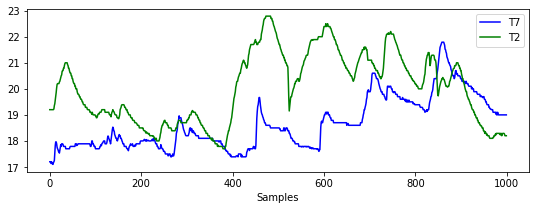

In [4]:
import matplotlib.pyplot as plt

# Let's visualize some of the data
n_samples = 1000
feature_name = "T7"
target_name = "T2"

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(df[feature_name].values[:n_samples], 'b-', label=feature_name)
ax.plot(df[target_name].values[:n_samples], 'g-', label=target_name)
ax.set_xlabel('Samples')
ax.legend()
plt.show()

## Problem Definition
Here is the problem statement.

**Given the current and past 11 hours of the following measurements:**
- `lights` energy use of light fixtures in the house (Wh)
- `T3` Temperature in laundry room area (C)
- `T4` Temperature in office room (C)
- `T5` Temperature in bathroom (C)
- `T6` Temperature outside the building (north side) (C)
- `T7` Temperature in ironing room (C)
- `T8` Temperature in teenager room 2 (C)
- `T9` Temperature in parents room (C)
- `T_out` Temperature outside (from Chievres weather station, C)
- `Press_mm_hg`: Pressure (from Chievres weather station, mm Hg)
- `RH_out` Humidity outside (from Chievres weather station, %)
- `Windspeed` Wind speed (from Chievres weather station, m/s)
- `Visibility` Visibility (from Chievres weather station, km)
- `Tdewpoint` Tdewpoint (from Chievres weather station, Â°C)

**Predict the current measurement of**
- `T2` Temperature in living room area, C<br>


So let's create our input data and target from the original dataset.

In [5]:
features_to_use = ["lights", # energy use of light fixtures in the house in Wh
                   "T3", # Temperature in laundry room area
                   "T4", # Temperature in office room, in Celsius
                   "T5", # Temperature in bathroom, in Celsius
                   "T6", # Temperature outside the building (north side), in Celsius
                   "T7", # Temperature in ironing room , in Celsius
                   "T8", # Temperature in teenager room 2, in Celsius
                   "T9", # Temperature in parents room, in Celsius
                   "T_out", # Temperature outside (from Chievres weather station), in Celsius
                   "Press_mm_hg", # (from Chievres weather station), in mm Hg
                   "RH_out", # Humidity outside (from Chievres weather station), in %
                   "Windspeed", # Windspeed (from Chievres weather station), in m/s
                   "Visibility", # Visibility (from Chievres weather station), in km
                   "Tdewpoint" # Dew point (from Chievres weather station), Â°C
                  ]
target_name = "T2"

# Grab a portion of the data to make training and testing faster
data = df[features_to_use].values
target = df[target_name].values.reshape(-1, 1)

We will initialize the seed of the random number generator so that we get repeatable results.

In [6]:
from numpy.random import seed
seed(0)
import tensorflow as tf
tf.random.set_seed(0)

## Data Pre-Processing
Typical tabular datasets are of form *(N_samples, N_features)*. However, a time-series dataset is of the form *(N_samples, N_timesteps, N_features)*. For example, N_timesteps is 12 in our problem. The output shape depends on the problem at hand. In our case, the output will be of shape (N_samples, 1) since we only want to predict one output at one time step.

Next, we will take our dataset and prepare it for model training.

### Create samples from time-series data
We need to convert our tabular time-series dataset and create input samples of shape (N_samples, N_timesteps, N_features) and output of (N_samples, 1). 

The following function creates a historical window at a given time. There are many different and more efficient ways of doing this task that do not need looping.

In [7]:
import numpy as np

# Creating samples with history
def chop_data(data, target, history_to_use):
    k = history_to_use
    data_list = []
    target_list = []
    while k < data.shape[0]:
        data_list += [data[k-history_to_use+1:k+1, :]]
        target_list += [target[k]]        
        k += 1
    chopped_data = np.stack(data_list, axis=0)
    chopped_target = np.stack(target_list, axis=0)
    return chopped_data, chopped_target

data_ts, target_ts = chop_data(data, target, 12)

# Print shapes
print('data_ts is of shape: {0}'.format(data_ts.shape))
print('target_ts is of shape: {0}'.format(target_ts.shape))

data_ts is of shape: (19723, 12, 14)
target_ts is of shape: (19723, 1)


Are data shapes of the right format?

### Split the data into train, test, validation
For training a model and evaluating the performance, we divide the model into three sets:
1. train
2. validation
3. test

The training and validation data is used to design the architecture, train the model, and optimize the hyperparameters. The test set is used to report the accuracy.

In [8]:
# Import Scikit-learn data splitting functions
from sklearn.model_selection import train_test_split

# Determine train test splits
test_ratio = 0.15

# Split the data into training and testing
x_trn, x_tst, y_trn, y_tst = train_test_split(data_ts, target_ts, test_size=test_ratio, shuffle=True, random_state=0)

# Split the training data into training and validation
x_trn, x_vld, y_trn, y_vld = train_test_split(x_trn, y_trn, test_size=test_ratio, shuffle=True, random_state=0)

# Print how many samples we have in each set
print("Number of samples in the training set: ", x_trn.shape[0])
print("Number of samples in the validation set: ", x_vld.shape[0])
print("Number of samples in the test set: ", x_tst.shape[0])

Number of samples in the training set:  14249
Number of samples in the validation set:  2515
Number of samples in the test set:  2959


### Normalize the Data
Next, we will normalize the data. Can you explain why we need to normalize the data?

In [9]:
# Normalize the data
mean = x_trn.mean(axis=(0,1))
std = x_trn.std(axis=(0,1))
x_trn = (x_trn - mean)/std
x_vld = (x_vld - mean)/std
x_tst = (x_tst - mean)/std

## ANN model with Keras

### Developing ANN Model
First, we need to decide on the architecture. For now, we can start by a two layer ANN where the activation function of the first layer can be "relu" or "sigmoid" (Feel free to try both). The activation function of the last layer should be linear as our task is regression.  

ANN's take in tabular datasets. So we have to either use the features only at the current time step of each sample, or concatenate all the features from all the time-steps. For this example, we will use the features only at the current time step.

There are two ways of developing a keras model, **Sequential** and **Functional**. In a nutshell, in **sequential** models, we keep stacking layers on top of each other until we get the desired architecture. **Funcitonal** models give more flexibility in designing complex architectures with multiple inputs, multiple outputs, etc. They start by first determining the inputs and then passing them through the desired blocks.  

In this tutorial, we will use sequential model syntax.

In [10]:
# Import keras Sequential model
from tensorflow.keras.models import Sequential

# import keras layers needed
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense

# First, we create a placeholder for the model
model = Sequential()

# Then, we add the two layers
model.add(Dense(units=32, activation='relu', input_shape=x_trn.shape[2:]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Now, we can compile the model
model.compile(optimizer='adam', loss='mae')

# And see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


Let's review the the model summary, layers, shapes, and parameteres.

### Training the model
We can now start training the model. Once this model is trained, we can go back and add more layers to make it more powerful. We should be careful about overfitting though. That's why we should keep an eye on the validation loss.

Train on 14249 samples, validate on 2515 samples
Epoch 1/40
14249/14249 [==============================] - 0s 22us/sample - loss: 18.2705 - val_loss: 15.3117
Epoch 2/40
14249/14249 [==============================] - 0s 4us/sample - loss: 10.4026 - val_loss: 7.0717
Epoch 3/40
14249/14249 [==============================] - 0s 4us/sample - loss: 5.9759 - val_loss: 4.9092
Epoch 4/40
14249/14249 [==============================] - 0s 3us/sample - loss: 4.1333 - val_loss: 3.4531
Epoch 5/40
14249/14249 [==============================] - 0s 4us/sample - loss: 3.0599 - val_loss: 2.6993
Epoch 6/40
14249/14249 [==============================] - 0s 5us/sample - loss: 2.4758 - val_loss: 2.2408
Epoch 7/40
14249/14249 [==============================] - 0s 4us/sample - loss: 2.0672 - val_loss: 1.8672
Epoch 8/40
14249/14249 [==============================] - 0s 4us/sample - loss: 1.7463 - val_loss: 1.5903
Epoch 9/40
14249/14249 [==============================] - 0s 4us/sample - loss: 1.4782 - val_loss: 

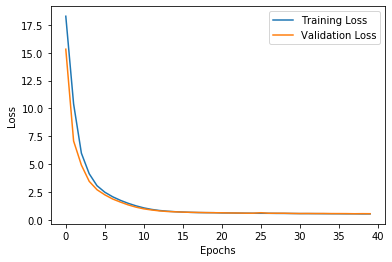

In [11]:
# Training the model, history will include some informaiton about the training...
history = model.fit(x_trn[:,-1,:],
                    y_trn,
                    validation_data=(x_vld[:,-1,:], y_vld),
                    epochs=40,
                    batch_size=256)

# Plot the training and validation loss curves
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

What can we learn from the above curve? Why is the error very high very high at the beginning?

### Making Predictions with the Trained Model
Once the model is trained and we have optimized the parameters, we can evaluate its performance on the test set or any new input data.

In [12]:
# Evaluating the model on the test set
test_loss = model.evaluate(x_tst[:, -1, :], y_tst)
print("Test accuracy is: ", str(test_loss))


2959/2959 [==============================] - 0s 27us/sample - loss: 0.5499
Test accuracy is:  0.5499452319287013


## RNN Model with Keras
Now that we are familiar with making models in Keras, we can start developing RNN models. The steps are pretty much similar. We should just pick the right layers. In this tutorial we will use LSTM layers.

### Developing RNN Model
We can use the same Sequential API as before to develop our RNN model. In addition, we will initialize the last layer's bias to the mean of our training dataset to speed up training.

In [13]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Dropout

from tensorflow.keras import initializers

# First, we create a placeholder for the model
model = Sequential()

# Then, we add the two layers
model.add(LSTM(units=32, return_sequences=True, input_shape=x_trn.shape[1:]))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dense(units=1))

# Now, we can compile the model
model.compile(optimizer='Adam', loss='mae')

# And see the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 32)            6016      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 14,369
Trainable params: 14,369
Non-trainable params: 0
_________________________________________________________________


### Training the model
We can now start training the model. Same as before, once this model is trained, we can go back and add more layers to make it more powerful. And similarly, we should be careful about overfitting. 

Train on 14249 samples, validate on 2515 samples
Epoch 1/40
14249/14249 [==============================] - 6s 421us/sample - loss: 17.7247 - val_loss: 13.2900
Epoch 2/40
14249/14249 [==============================] - 1s 96us/sample - loss: 10.8996 - val_loss: 9.2693
Epoch 3/40
14249/14249 [==============================] - 2s 124us/sample - loss: 8.0298 - val_loss: 6.9024
Epoch 4/40
14249/14249 [==============================] - 2s 117us/sample - loss: 5.7942 - val_loss: 4.7605
Epoch 5/40
14249/14249 [==============================] - 2s 121us/sample - loss: 3.7263 - val_loss: 2.8351
Epoch 6/40
14249/14249 [==============================] - 2s 131us/sample - loss: 2.2234 - val_loss: 1.8896
Epoch 7/40
14249/14249 [==============================] - 2s 109us/sample - loss: 1.7349 - val_loss: 1.7191
Epoch 8/40
14249/14249 [==============================] - 2s 115us/sample - loss: 1.6756 - val_loss: 1.7009
Epoch 9/40
14249/14249 [==============================] - 1s 105us/sample - loss: 1.6

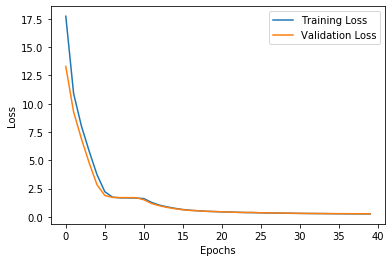

In [14]:
# Training the model, history will include some informaiton about the training...
history = model.fit(x_trn,
                    y_trn,
                    validation_data=(x_vld, y_vld),
                    epochs=40,
                    batch_size=256)

# Plot the training and validation loss curves
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [15]:
# Let's evaluate the model on the test set
test_loss = model.evaluate(x_tst, y_tst)
print("Test accuracy is: ", str(test_loss))


2959/2959 [==============================] - 1s 410us/sample - loss: 0.2807
Test accuracy is:  0.2806838842693637


## Additional Topics to Try
You can read about the following topics if you like to further pursue this topic:
- Initializing output bias
- Should we shuffle time-series data?
- Dropout
- BatchNotmalization
- Bidirectional RNN
- Loss functions (mae, mse, hinge loss, etc.)
- Optimization methods (Adam, SGD, Adadelta, etc.)
- Regularization
- Early stopping

Then, revise the model and check if it results in better or worse performance.

## Post-Workshop
Thank you for taking part.  Please visit the page below to download the complete notebook and complete a brief survey.

[Post-Workshop: Applied Machine Learning and Time-Series Analysis](https://iterativelearning.io/post-workshop-applied-machine-learning-and-time-series-analysis/)

### Questions
If you have any questions about this workshop or similar workshops, feel free to email us at [team@iterativelearning.io](team@iterativelearning.io).